First we import MaBoSS

In [1]:
import maboss

This notebook has been executed using the docker image `colomoto/colomoto-docker:2022-05-01`

## Model of Tumor invasion (Cohen et al.)

#### Loading the model

In [2]:
model_invasion = maboss.load("models/metastasis.bnd", "models/metastasis.cfg")

#### Running the simulation

In [3]:
res_invasion = model_invasion.run()

#### Visualising the steady states distribution

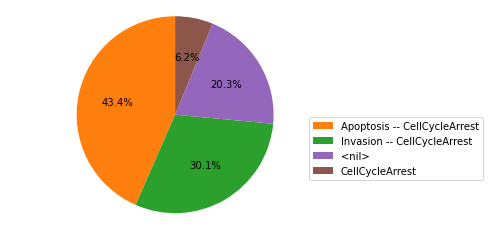

In [4]:
res_invasion.plot_piechart()

#### Visualising the trajectory of steady states distribution

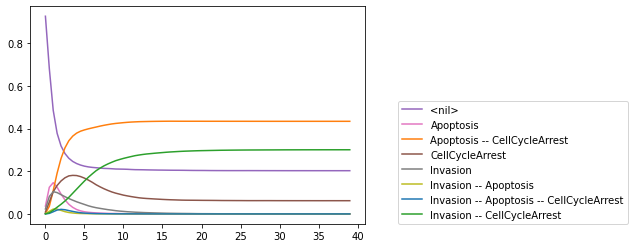

In [5]:
res_invasion.plot_trajectory()

#### Visualizing the trajectory of individual nodes

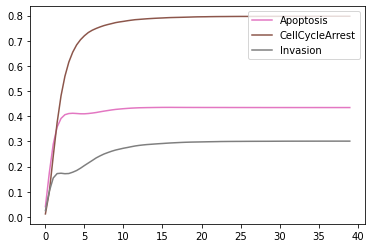

In [6]:
res_invasion.plot_node_trajectory()

#### Getting the trajectories as a pandas dataframe

In [7]:
table = res_invasion.get_states_probtraj()
table

,<nil>,Apoptosis,Apoptosis -- CellCycleArrest,CellCycleArrest,Invasion,Invasion -- Apoptosis,Invasion -- Apoptosis -- CellCycleArrest,Invasion -- CellCycleArrest
0.0,0.927211,0.036734,0.002495,0.008816,0.023224,0.001194,0.000086,0.000240
0.5,0.682001,0.124939,0.035559,0.056035,0.081564,0.012353,0.002428,0.005121
1.0,0.485872,0.146506,0.109373,0.103834,0.104372,0.022607,0.010071,0.017365
1.5,0.378143,0.124966,0.191455,0.133481,0.100016,0.022513,0.018048,0.031378
2.0,0.318932,0.093268,0.259885,0.154564,0.090280,0.016553,0.021432,0.045086
...,...,...,...,...,...,...,...,...
37.0,0.202716,0.000000,0.434370,0.061996,0.000007,0.000000,0.000000,0.300912
37.5,0.202720,0.000000,0.434370,0.061987,0.000010,0.000000,0.000000,0.300913
38.0,0.202716,0.000000,0.434370,0.061990,0.000004,0.000000,0.000000,0.300920
38.5,0.202714,0.000000,0.434370,0.061996,0.000000,0.000000,0.000000,0.300920


In [8]:
n_ap_n_inv = table["<nil>"]+table["CellCycleArrest"]

<AxesSubplot:>

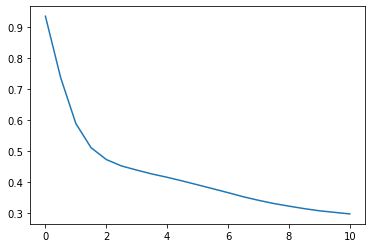

In [9]:
n_ap_n_inv[n_ap_n_inv.index <= 10].plot()

In [10]:
no_ecm_no_dd = model_invasion.copy()

In [11]:
help(no_ecm_no_dd.network.set_istate)

Help on method set_istate in module maboss.network:

set_istate(nodes, probDict, warnings=True) method of maboss.network.Network instance
    Change the inital states probability of one or several nodes.
    
    :param nodes: the node(s) whose initial states are to be modified
    :type nodes: a :py:class:`Node` or a list or tuple of :py:class:`Node`
    :param dict probDict: the probability distribution of intial states
    
    If nodes is a Node object or a singleton, probDict must be a probability
    distribution over {0, 1}, it can be expressed by a list [P(0), P(1)] or a
    dictionary: {0: P(0), 1: P(1)}.
    
    If nodes is a tuple or a list of several Node objects, the Node object 
    will be bound, and probDict must be a probability distribution over a part
    of {0, 1}^n. It must be expressed in the form of a dictionary
    {(b1, ..., bn): P(b1,..,bn),...}. States that do not appear in the 
    dictionary will be considered to be impossible. If a state has a 0 probabili

In [12]:
no_ecm_no_dd.network.set_istate('ECMicroenv', [1, 0])
no_ecm_no_dd.network.set_istate('DNAdamage', [1, 0])

In [13]:
res_no_ecm_no_dd = no_ecm_no_dd.run()

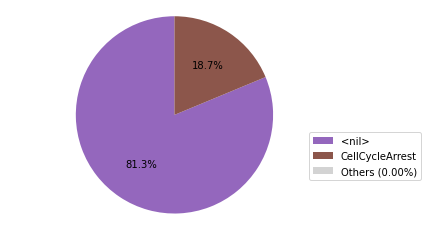

In [14]:
res_no_ecm_no_dd.plot_piechart()

In [15]:
ecm_no_dd = model_invasion.copy()

In [16]:
ecm_no_dd.network.set_istate('ECMicroenv', [0, 1])
ecm_no_dd.network.set_istate('DNAdamage', [1, 0])

In [17]:
res_ecm_no_dd = ecm_no_dd.run()

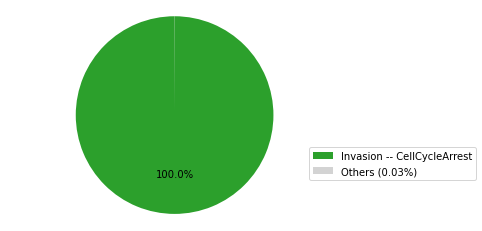

In [18]:
res_ecm_no_dd.plot_piechart()

In [19]:
ecm_dd = model_invasion.copy()

In [20]:
ecm_dd.network.set_istate('ECMicroenv', [0, 1])
ecm_dd.network.set_istate('DNAdamage', [0, 1])

In [21]:
res_ecm_dd = ecm_dd.run()

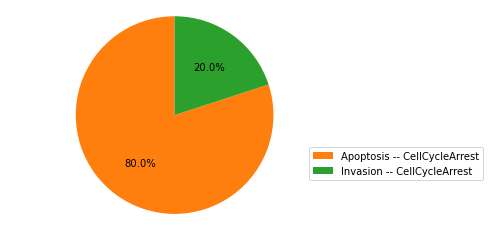

In [22]:
res_ecm_dd.plot_piechart()

In [23]:
mutant_invasion = model_invasion.copy()

In [24]:
help(mutant_invasion.mutate)

Help on method mutate in module maboss.simulation:

mutate(node, state) method of maboss.simulation.Simulation instance
    Trigger or untrigger mutation for a node.
    
    :param node: The :py:class:`Node` to be modified
    :type node: :py:class:`Node`
    :param str State:
    
        * ``'ON'`` (always up)
        * ``'OFF'`` (always down)
        * ``'WT'`` (mutable but with normal behaviour)
    
    
    The node will appear as a mutable node in the bnd file.
    This means that its rate will be of the form:
    
    ``rate_up = $LowNode ? 0 :($HighNode ? 1: (@logic ? rt_up : 0))``
    
    If the node is already mutable, this method will simply set $HighNode
    and $LowNode accordingly to the desired mutation.



In [25]:
mutant_invasion.network.keys()

odict_keys(['ECMicroenv', 'DNAdamage', 'Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest', 'GF', 'TGFbeta', 'p21', 'CDH1', 'CDH2', 'VIM', 'TWIST1', 'SNAI1', 'SNAI2', 'ZEB1', 'ZEB2', 'AKT1', 'DKK1', 'CTNNB1', 'NICD', 'p63', 'p53', 'p73', 'miR200', 'miR203', 'miR34', 'AKT2', 'ERK', 'SMAD'])

In [26]:
mutant_invasion.mutate('NICD', 'ON')
mutant_invasion.mutate('p53', 'OFF')

In [27]:
res_mutant_invasion = mutant_invasion.run()

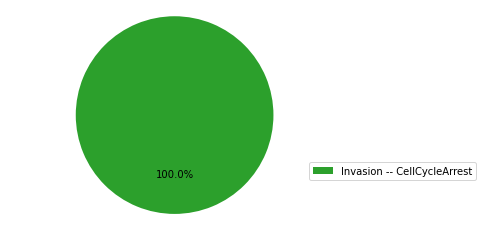

In [28]:
res_mutant_invasion.plot_piechart()

In [29]:
model_prostate = maboss.load("models/Montagud2022_Prostate_Cancer.bnd", "models/Montagud2022_Prostate_Cancer.cfg")

In [30]:
res_prostate = model_prostate.run()

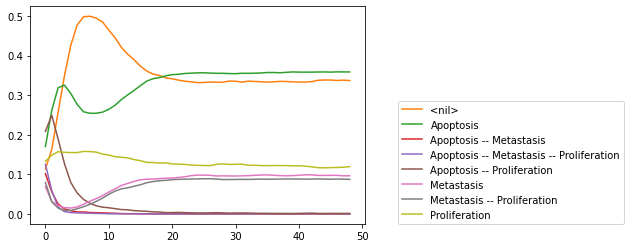

In [31]:
res_prostate.plot_trajectory()

In [32]:
model_prostate.network.keys()

odict_keys(['Acidosis', 'AKT', 'AMPK', 'AMP_ATP', 'Androgen', 'APAF1', 'Apoptosis', 'AR', 'AR_ERG', 'ATM', 'ATR', 'AXIN1', 'BAD', 'Bak', 'BAX', 'BCL2', 'Bcl_XL', 'beta_catenin', 'BIRC5', 'BMP2', 'BRCA1', 'BRCA2', 'Carcinogen', 'Caspase3', 'Caspase8', 'Caspase9', 'CDH2', 'cFLAR', 'CHK1_2', 'COX4I2', 'CyclinB', 'CyclinD', 'CytoC', 'DAXX', 'DNA_Damage', 'DNA_Repair', 'Dsh', 'E2F1', 'eEF2', 'eEF2K', 'EGF', 'EGFR', 'EMT', 'EP300', 'ERG', 'ERK', 'ETS1', 'ETV1', 'EZH2', 'E_cadherin', 'FADD', 'FGF', 'FGFR3', 'FOS', 'FOXA1', 'FOXO', 'FRS2', 'fused_event', 'GADD45', 'GLI', 'GLUT1', 'GSH', 'GSK3', 'HIF1', 'HSPs', 'Hypoxia', 'IDH1', 'IKK', 'Invasion', 'JNK', 'JUN', 'Lactic_acid', 'LDHA', 'MAP3K1_3', 'MDM2', 'MED12', 'MEK1_2', 'Metastasis', 'Migration', 'mTORC1', 'mTORC2', 'MXI1', 'MYC', 'MYC_MAX', 'NCOA3', 'NCOR1', 'NCOR2', 'NF1', 'NF_kB', 'NKX3_1', 'Nutrients', 'p14ARF', 'p15', 'p21', 'p38', 'p53', 'p70S6kab', 'p90RSK', 'PDK1', 'PHDs', 'PI3K', 'PIP3', 'PKC', 'Proliferation', 'PTCH1', 'PTEN', 'RAF

These healthy cells mostly exhibit quiescence (neither proliferation nor apoptosis) in the absence of any input (Figure 3A)

In [33]:
for node in model_prostate.network.keys():
    model_prostate.network.set_istate(node, [1, 0])

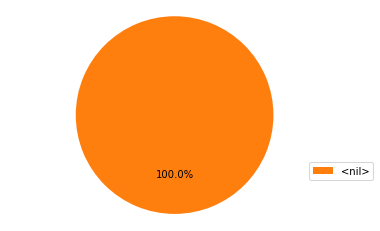

In [34]:
res_prostate_zero = model_prostate.run()
res_prostate_zero.plot_piechart()

When Nutrients and growth factors (EGF or FGF) are present, Proliferation is activated (Figure 3B).

In [35]:
prostate_growth = model_prostate.copy()

In [36]:
prostate_growth.network.set_istate('EGF', [0, 1])
prostate_growth.network.set_istate('Nutrients', [0, 1])

In [37]:
res_prostate_growth = prostate_growth.run()

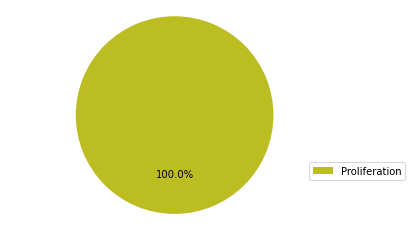

In [38]:
res_prostate_growth.plot_piechart()

The model was simulated with Carcinogen, Androgen, TNFalpha, Acidosis, and Hypoxia ON.

In [39]:
prostate_death = model_prostate.copy()

In [40]:
prostate_death.network.set_istate('Carcinogen', [0, 1])
prostate_death.network.set_istate('Androgen', [0, 1])
prostate_death.network.set_istate('TNFalpha', [0, 1])
prostate_death.network.set_istate('Acidosis', [0, 1])
prostate_death.network.set_istate('Hypoxia', [0, 1])

In [41]:
res_prostate_death = prostate_death.run()

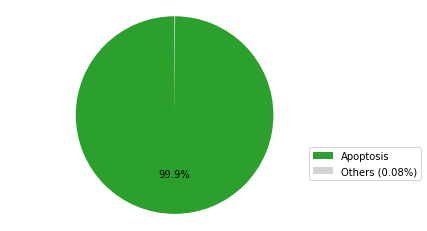

In [42]:
res_prostate_death.plot_piechart()

In [43]:
mutant_prostate_death = prostate_growth.copy()

In [44]:
mutant_prostate_death.mutate("MYC_MAX", "OFF")

In [45]:
res_mutant_prostate_death = mutant_prostate_death.run()

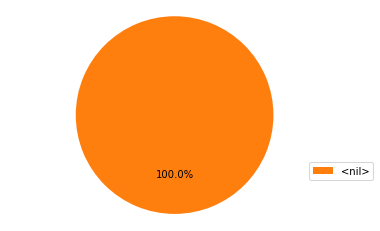

In [46]:
res_mutant_prostate_death.plot_piechart()

In [47]:
from maboss.pipelines import simulate_single_mutants, filter_sensitivity

In [48]:
help(filter_sensitivity)

Help on function filter_sensitivity in module maboss.pipelines:

filter_sensitivity(results, state=None, node=None, minimum=None, maximum=None)
    Filter a list of results by state of nodes value
    
    :param results: the list of results to filter
    :param state: the state on which to apply the filter (default None)
    :param node: the state on which to apply the filter (default None)
    :param minumum: the minimal value of the node (default None)
    :param maximum: the maximal value of the node (default None)
    
    Example : 
    
    Filtering results showing more than 50% for Proliferation node
    >>> res_ensemble = filter_sensitivity(results, node='Proliferation', maximum=0.5)
    
    Filtering results showing more than 10% for Apoptosis -- NonACD state
    >>> res_ensemble = filter_sensitivity(results, state='Apoptosis -- NonACD', minimum=0.1)



In [49]:
simulations = simulate_single_mutants(prostate_growth, ["AKT", "AR", "EGFR", "ERK", "MYC_MAX", "ROS"], "OFF")

('AKT', 'OFF')
('AR', 'OFF')
('EGFR', 'OFF')
('ERK', 'OFF')
('MYC_MAX', 'OFF')
('ROS', 'OFF')


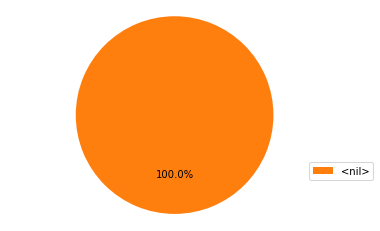

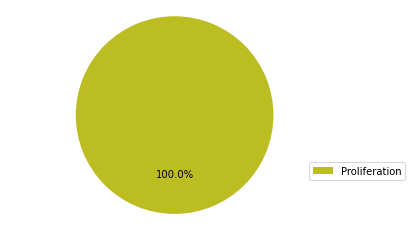

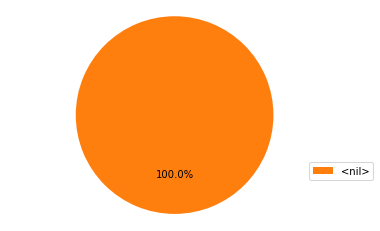

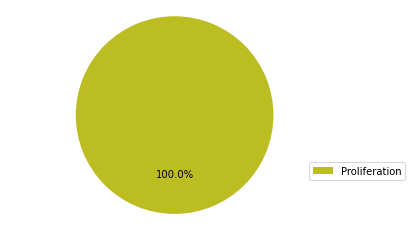

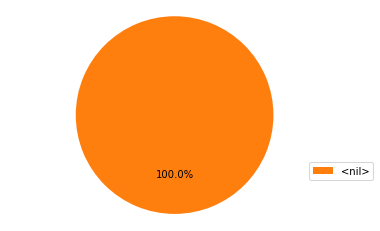

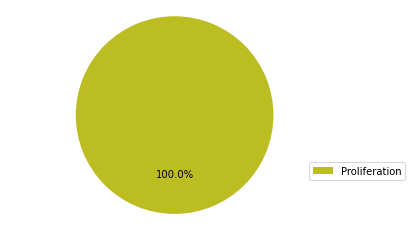

In [50]:
for simulation, result in simulations.items():
    
    print(simulation)
    result.plot_piechart()

In [51]:
help(filter_sensitivity)

Help on function filter_sensitivity in module maboss.pipelines:

filter_sensitivity(results, state=None, node=None, minimum=None, maximum=None)
    Filter a list of results by state of nodes value
    
    :param results: the list of results to filter
    :param state: the state on which to apply the filter (default None)
    :param node: the state on which to apply the filter (default None)
    :param minumum: the minimal value of the node (default None)
    :param maximum: the maximal value of the node (default None)
    
    Example : 
    
    Filtering results showing more than 50% for Proliferation node
    >>> res_ensemble = filter_sensitivity(results, node='Proliferation', maximum=0.5)
    
    Filtering results showing more than 10% for Apoptosis -- NonACD state
    >>> res_ensemble = filter_sensitivity(results, state='Apoptosis -- NonACD', minimum=0.1)



In [52]:
res_filtered = filter_sensitivity(simulations, state='Proliferation', maximum=0)

In [53]:
res_filtered

{('AKT', 'OFF'): <maboss.result.Result at 0x7f17fd92bb80>,
 ('EGFR', 'OFF'): <maboss.result.Result at 0x7f17fd92b190>,
 ('MYC_MAX', 'OFF'): <maboss.result.Result at 0x7f17fd93b2b0>}